## Курсовой проект: "Предсказание цен на жильё"

In [169]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

**Загрузка данных для расчёта проекта**

In [170]:
X = pd.read_csv('train.csv')
y = pd.DataFrame({'Price': X['Price']})

In [171]:
X.drop(columns='Price', inplace=True)

In [172]:
X_test = pd.read_csv('test.csv')

In [173]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B


**Описание датасета:**

**Id** - идентификационный номер квартиры<br>
**DistrictId** - идентификационный номер района<br>
**Rooms** - количество комнат<br>
**Square** - площадь<br>
**LifeSquare** - жилая площадь<br>
**KitchenSquare** - площадь кухни<br>
**Floor** - этаж<br>
**HouseFloor** - количество этажей в доме<br>
**HouseYear** - год постройки дома<br>
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности<br>
**Social_1, Social_2, Social_3** - социальные показатели местности<br>
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья<br>
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров<br>
**Price** - цена квартиры<br>

**Определение наличия пропусков**

In [174]:
X.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [175]:
#данные признаков(там где пропуски) 'LifeSquare' и 'Healthcare_1' в дальнейшем будут заменены на медиану

**Выявление выбросов аналитическим методом**

In [176]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [177]:
#1. обращаем внимание на значения минимум и максимум - выбираем квантиль 2,5% от минимума и максимума и заменим
# данные значения медианой
#2. все нулевые значения заменяем медианой
#3. сравниваем квадратные метры: общая плащадь, жилая и кухня. После преобразований общая плащадь должна быть
# больше или равна сумме плащадей жилой и кухни
#4. сравниваем этажи: жилой этаж не должен превышать этажность дома
#5. выявляем категориальные признаки с буквенными данным для дальнейшей замены на тип boolean(бинарные)

**Создание класса для преобразования данных**

In [178]:
class DataPrepare:


    def __init__(self):
        self.medians = None
        self.HouseYear_median = None
        self.Rooms_median = None
        self.Square_median = None
        self.LifeSquare_median = None
        self.KitchenSquare_median = None
        self.HouseFloor_median = None
        
    
    def fit(self, df):
        # вычисление медианы и моды (только по данным файла test)
        # опытным путем было выявлено, что комбинация медианы и моды приносит более лучший результат
        self.medians = df[['LifeSquare', 'Healthcare_1']].median()
        self.HouseYear_mode = df['HouseYear'].mode()[0]
        self.Rooms_mode = df['Rooms'].mode()[0]
        self.Square_mode = df['Square'].mode()[0]
        self.LifeSquare_mode = df['LifeSquare'].mode()[0]
        self.KitchenSquare_mode = df['KitchenSquare'].mode()[0]
        self.HouseFloor_mode = df['HouseFloor'].mode()[0]
        self.Floor_mode = df['Floor'].mode()[0]
        
        
    def transform(self, df):
        #замена типа данных
        df['HouseFloor'] = df['HouseFloor'].astype(int)
        
        #заполнение пропусков медианой
        df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(self.medians)
        
        #заполнение выбросов модой
        #опытным путем было выявлено, что квантиль 1,25% дает лучше результат, чем 2,5%, а затем: 1% лучше чем 1,25%
        #в конечном итоге был выбран 1%
        df.loc[df['HouseYear'] > 2022, 'HouseYear'] = int(self.HouseYear_mode)
        df.loc[df['Rooms'] <= 0, 'Rooms'] = int(self.Rooms_mode)
        df.loc[df['Rooms'] > 5, 'Rooms'] = int(self.Rooms_mode)
        square_min_value = np.quantile(df['Square'], q=0.01)
        df.loc[df['Square'] < square_min_value, 'Square'] = self.Square_mode
        square_max_value = np.quantile(df['Square'], q=0.99)
        df.loc[df['Square'] > square_max_value, 'Square'] = self.Square_mode
        lifesquare_min_value = np.quantile(df['LifeSquare'], q=0.01)
        df.loc[df['LifeSquare'] < lifesquare_min_value, 'LifeSquare'] = self.LifeSquare_mode
        lifesquare_max_value = np.quantile(df['LifeSquare'], q=0.99)
        df.loc[df['LifeSquare'] > lifesquare_max_value, 'LifeSquare'] = self.LifeSquare_mode
        df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square'] #здесь идет замена из расчета, что ошибка в колонке LifeSquare и ниже мы еще раз скорректируем LifeSquare
        df.loc[df['KitchenSquare'] <= 0, 'KitchenSquare'] = self.KitchenSquare_mode
        df.loc[df['KitchenSquare'] <= 3, 'KitchenSquare'] = 3
        kitchensquare_max_value = np.quantile(df['KitchenSquare'], q=0.99)
        df.loc[df['KitchenSquare'] > kitchensquare_max_value, 'KitchenSquare'] = self.KitchenSquare_mode
        df.loc[df['KitchenSquare'] + df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] - df['KitchenSquare']
        df.loc[df['Floor'] <= 0, 'Floor'] = int(self.Floor_mode)
        df.loc[df['HouseFloor'] <= 0, 'HouseFloor'] = int(self.HouseFloor_mode)
        housefloor_max_value = np.quantile(df['HouseFloor'], q=0.99)
        df.loc[df['HouseFloor'] > housefloor_max_value, 'HouseFloor'] = int(self.HouseFloor_mode)
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
        
        #преобразование категориальных признаков
        df.replace({'Ecology_2': {'A': 0, 'B': 1}, 'Ecology_3': {'A': 0, 'B': 1}, 'Shops_2': {'A': 0, 'B': 1}}, inplace = True)
        
        #удаление столбца 'Id'
        df = df.drop(['Id'], axis=1)
        
        return df
    

**Разбиение основного датасета на тренировочный и валидационный и обработка данных**

In [179]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [180]:
a = DataPrepare()

In [181]:
a.fit(X) #вычисление медианы и моды ряда показателей основного датасета

In [182]:
train = a.transform(X_train) #заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [183]:
train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000
mean,50.416133,1.883467,54.349889,33.019819,6.265733,7.824533,12.856667,1984.674667,0.117640,0.989733,0.972800,24.605733,5332.234533,7.914133,1024.02400,1.311067,4.180933,0.917200
std,43.718953,0.810498,18.199446,14.027242,2.949171,5.090815,6.057608,18.391297,0.119138,0.100810,0.162677,17.562436,4015.545522,23.504289,745.84684,1.492359,4.760786,0.275598
min,0.000000,1.000000,1.136859,-13.863141,1.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,41.378922,23.779291,3.000000,4.000000,9.000000,1973.750000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.00000,0.000000,1.000000,1.000000
50%,36.000000,2.000000,51.774107,32.781260,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.00000,1.000000,3.000000,1.000000
75%,75.000000,2.000000,65.227249,38.788973,9.000000,11.000000,17.000000,2000.000000,0.194489,1.000000,1.000000,36.000000,7227.000000,5.000000,990.00000,2.000000,5.000000,1.000000
max,209.000000,5.000000,117.714551,86.692964,16.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.00000,6.000000,23.000000,1.000000


In [184]:
valid = a.transform(X_valid)#заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [185]:
valid.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,50.354800,1.903200,55.264171,33.665915,6.312400,8.179600,13.218000,1985.431200,0.122511,0.992000,0.971600,24.930800,5411.926000,8.414400,1033.363600,1.344800,4.382400,0.918400
std,43.199771,0.812708,18.976695,14.653410,2.988374,5.295976,6.124956,18.457972,0.118634,0.089102,0.166146,17.444074,3980.648735,24.789717,749.211327,1.497334,4.938373,0.273809
min,0.000000,1.000000,1.136859,-11.863141,1.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,41.807904,24.707816,3.000000,4.000000,9.000000,1975.000000,0.033494,1.000000,1.000000,8.000000,1892.000000,0.000000,810.000000,0.000000,1.000000,1.000000
50%,35.500000,2.000000,52.491614,32.781260,6.000000,7.000000,14.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,74.000000,2.000000,66.003708,39.248666,9.000000,12.000000,17.000000,2002.000000,0.200147,1.000000,1.000000,35.000000,7287.000000,5.000000,1015.000000,3.000000,6.000000,1.000000
max,208.000000,5.000000,117.870532,95.645828,16.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [186]:
test = a.transform(X_test)#заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [187]:
test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.906200,54.879849,33.296543,6.273200,8.034800,12.897000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,44.179466,0.805935,18.404635,14.005080,2.912157,5.239798,6.089976,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,0.000000,1.000000,1.136859,-13.863141,1.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.635190,24.545907,3.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.284610,32.781260,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,77.000000,2.000000,65.802451,39.235736,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,212.000000,5.000000,115.553129,86.207348,15.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


**Уменьшение объёма памяти, который занимает датасет**

In [188]:
def reduce_mem_usage(df): #данная функция была взята из урока
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [189]:
train = reduce_mem_usage(train)
valid = reduce_mem_usage(valid)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1.31 MB
Memory usage after optimization is: 0.60 MB
Decreased by 54.6%
Memory usage of dataframe is 0.42 MB
Memory usage after optimization is: 0.18 MB
Decreased by 57.3%
Memory usage of dataframe is 0.67 MB
Memory usage after optimization is: 0.19 MB
Decreased by 71.4%


**Выявление выбросов графическим методом**

In [190]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

График целевой переменной

<Figure size 720x720 with 0 Axes>

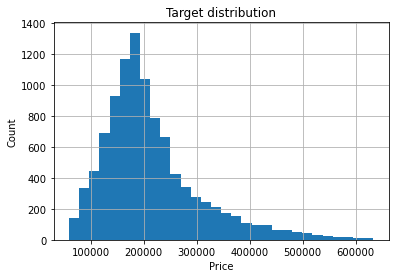

In [191]:
plt.figure(figsize = (10, 10))
y.hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [192]:
#целевая переменная явных выбросов не имеет

array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>],
       [<AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>,
        <AxesSubplot:title={'center':'Social_1'}>],
       [<AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

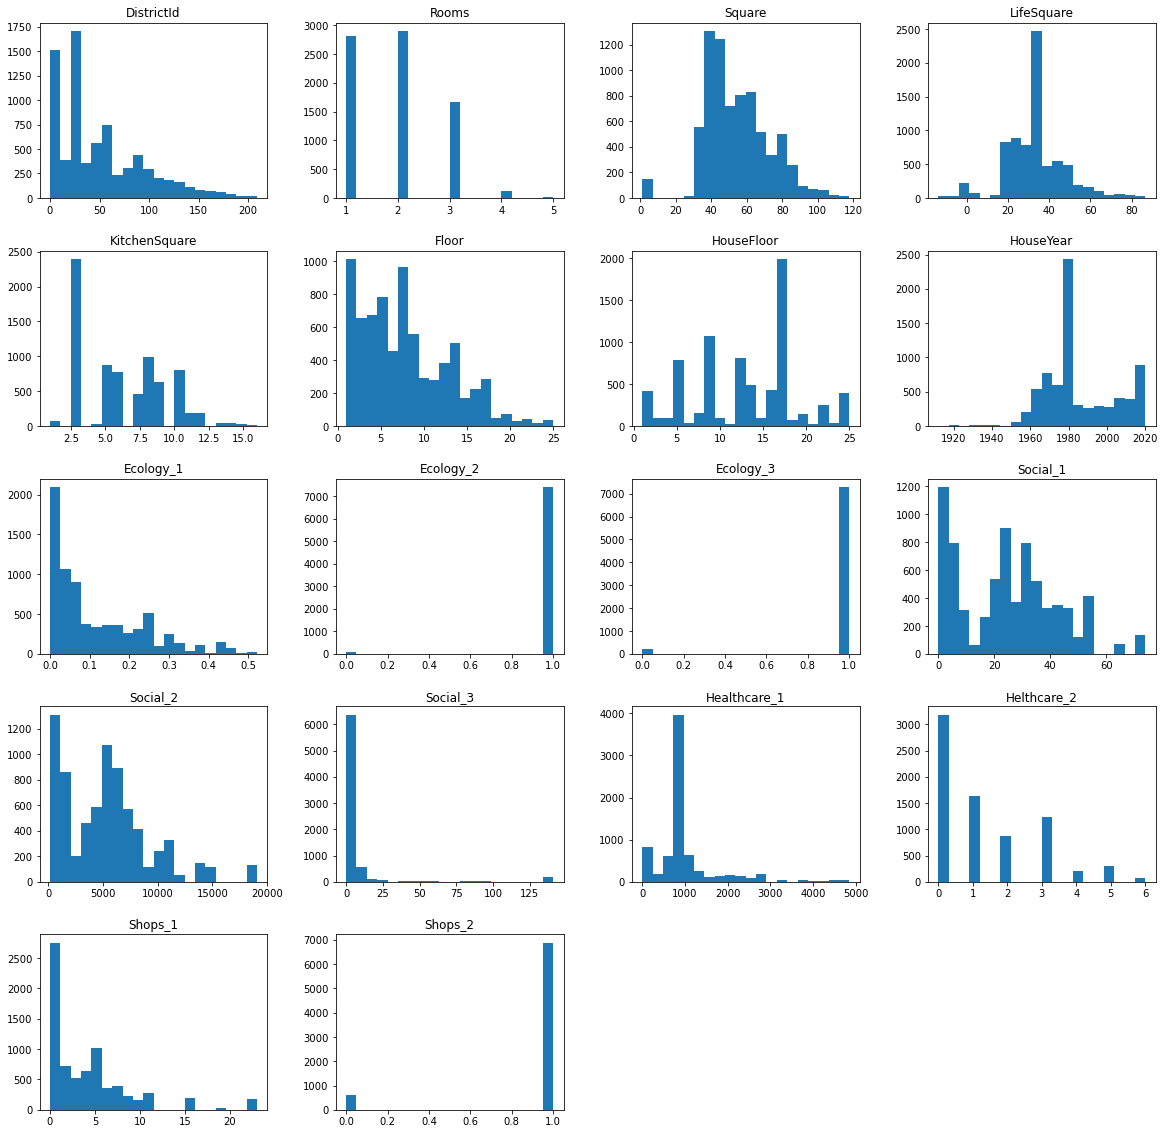

In [193]:
train.hist(figsize=(20, 20), bins=20, grid=False)

In [194]:
#явных выбросов не выявлено, изменять данные не будем(позже, для поиска лучшей подгодовки данных из датасета были 
# удалены 'Shops_2', 'Social_3', 'Ecology_2', 'Ecology_3', а также были добавлены новые признаки на основе 'DistrictId', 
# но данные изменения не принесли улучшений в расчетах, поэтому датасету был возвращён первоначальный вид)

**Стандартизация значений параметров датасета**

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [196]:
def std(df):#функция для стандартизации датафрейма
    df = pd.DataFrame(scaler.transform(df), columns = df.columns)
    return df

In [197]:
train_std = std(train)
test_std = std(test)
valid_std = std(valid)

In [198]:
train_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,1.111351,0.143789,0.165013,0.239220,0.927192,0.034470,0.188756,0.724594,-0.706334,0.101849,0.167214,2.357135,1.305206,-0.294184,0.399540,1.131796,0.802246,0.300458
1,-0.055269,1.377680,1.393295,1.056020,1.266293,1.409587,0.684034,-0.036686,-0.642279,0.101849,0.167214,1.218265,1.041713,-0.123991,-0.166297,-0.208454,1.222373,0.300458
2,2.277971,0.143789,-0.391201,-0.183746,-0.090110,0.427360,-0.141429,-0.743590,-0.813380,0.101849,0.167214,-0.034493,0.069924,-0.123991,0.423676,0.461671,0.172056,0.300458
3,-1.016015,-1.090102,-0.835397,0.222961,-1.107413,1.802477,0.684034,1.757760,1.054012,0.101849,0.167214,-1.116419,-0.938474,-0.336733,-0.649002,-0.878578,-0.878261,0.300458
4,-1.061764,0.143789,-0.481072,-0.216282,-0.429211,-0.554866,-1.297078,-1.287361,-0.634666,0.101849,0.167214,0.705773,0.379492,3.237322,1.228184,0.461671,0.172056,0.300458


In [199]:
valid_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-1.084639,1.377680,2.610848,4.123886,1.605394,-0.161976,0.353849,1.540251,-0.560223,0.101849,0.167214,1.047434,1.317161,-0.294184,-1.332834,0.461671,-0.248071,0.300458
1,-0.650016,-1.090102,1.820822,-0.017008,-1.107413,1.606032,0.684034,-0.417327,0.007536,0.101849,0.167214,0.307168,0.217859,-0.294184,0.213163,-0.208454,-0.878261,0.300458
2,2.323721,0.143789,-0.752820,-0.765073,0.248990,-0.358421,-0.636707,-1.124230,-0.634666,0.101849,0.167214,0.705773,0.379492,3.237322,1.228184,0.461671,0.172056,0.300458
3,-0.215393,-1.090102,-0.628637,-0.862414,0.927192,1.213141,0.518941,-0.254195,0.481953,0.101849,0.167214,0.648830,1.176199,-0.209088,-0.166297,-0.208454,-0.878261,0.300458
4,0.059106,-1.090102,-1.057339,-0.774576,0.927192,-0.554866,-0.141429,-0.961098,-0.570823,0.101849,0.167214,0.534943,0.604383,-0.336733,-1.066006,-0.208454,-0.248071,0.300458


In [200]:
test_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-0.146768,-1.090102,-0.961756,-0.992823,-0.429211,-0.554866,-0.636707,-0.797967,-0.684269,0.101849,0.167214,-0.034493,-0.237651,-0.336733,0.016058,-0.208454,-0.668197,0.300458
1,0.264980,-1.090102,-0.651491,-0.037495,1.266293,-0.161976,0.684034,1.757760,-0.381783,0.101849,0.167214,-1.287250,-1.171335,-0.294184,-0.166297,-0.878578,-0.878261,-3.328257
2,-0.535642,0.143789,0.281005,-0.017008,0.927192,2.195368,1.014219,-0.417327,0.787050,0.101849,0.167214,-0.888645,-0.856786,-0.336733,-0.166297,-0.878578,-0.668197,0.300458
3,-0.627141,1.377680,-0.258479,0.062312,-0.090110,-1.144202,-1.792356,-1.069853,-0.869355,0.101849,0.167214,-1.287250,-1.209688,-0.336733,-0.166297,-0.878578,-0.878261,0.300458
4,0.539479,-1.090102,-0.028180,-0.017008,-1.107413,0.034470,0.684034,-0.417327,1.610332,0.101849,0.167214,0.591886,0.593425,-0.166540,-0.045621,-0.878578,0.382119,0.300458


**Построение и выбор модели (в проекте останется только лучшая из нескольких моделей)**

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [202]:
def evaluate_preds(true_values, pred_values):#данная функция была взята из урока
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
    
    plt.figure(figsize=(8,8))
    
    plt.scatter(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    plt.show()

In [203]:
#были проанализированны следующие модели:
#LinearRegression
#RandomForestRegressor
#GradientBoostingRegressor
#для моделей RandomForestRegressor и GradientBoostingRegressor при помощи GridSearchCV были определены лучшие
#показатели из 70 возможных
#В конченом итоге была выбрана модель с лучшим показателем R2 - GradientBoostingRegressor

R2:	0.895


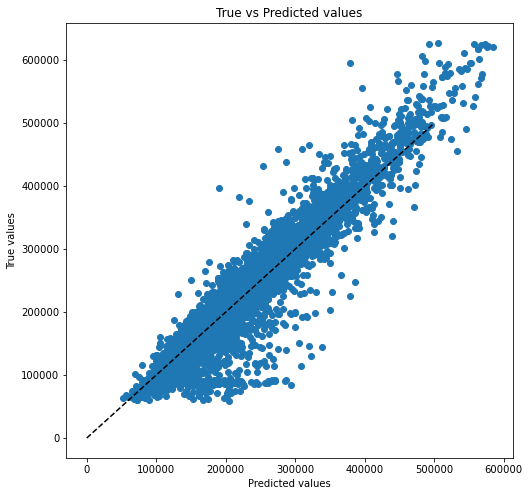

In [204]:
gb_model = GradientBoostingRegressor(max_depth=7,
                                     min_samples_leaf=25,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(train, y_train)
y_train_preds = gb_model.predict(train)
evaluate_preds(y_train, y_train_preds)

R2:	0.741


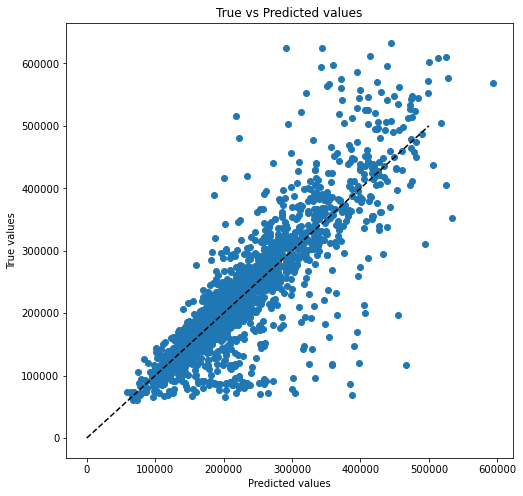

In [205]:
y_valid_preds = gb_model.predict(valid)
evaluate_preds(y_valid, y_valid_preds)

**Расчет цен для квартир на тестовом датасете**

In [206]:
y_test = gb_model.predict(test)

In [207]:
y_test

array([159926.25703365, 125814.87435984, 141680.56889928, ...,
       143776.11982465, 193923.26949689, 281396.44145806])

In [208]:
df_y_test = pd.DataFrame({'Id': X_test['Id'], 'Price': y_test})

In [209]:
df_y_test.head()

,Id,Price
0,4567,159926.257034
1,5925,125814.874360
2,960,141680.568899
3,3848,116963.991683
4,746,185573.556906


In [210]:
df_y_test.to_csv('test_price_final_03.csv', index = False)